# House Pricing EDA

Correlated features in the dataset:


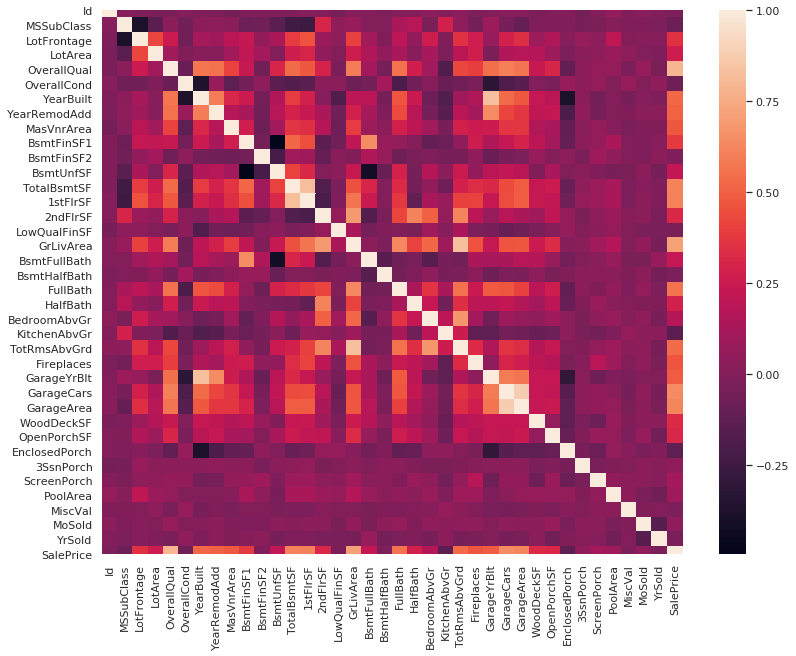

In [1]:
%matplotlib inline
import pandas as pd

houses = pd.read_csv('./train.csv')
df_cor = houses.corr()
import seaborn as sns
sns.set(rc={'figure.figsize':(13,10)})
print("Correlated features in the dataset:")
sns.heatmap(df_cor)

In [2]:
print("Features with a correlation to SalePrice which is higher than 0.5:")
correlations = houses.corr()['SalePrice'].sort_values(ascending=False).head(10)
correlations

Features with a correlation to SalePrice which is higher than 0.5:


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812c63d128>,
      dtype=object)

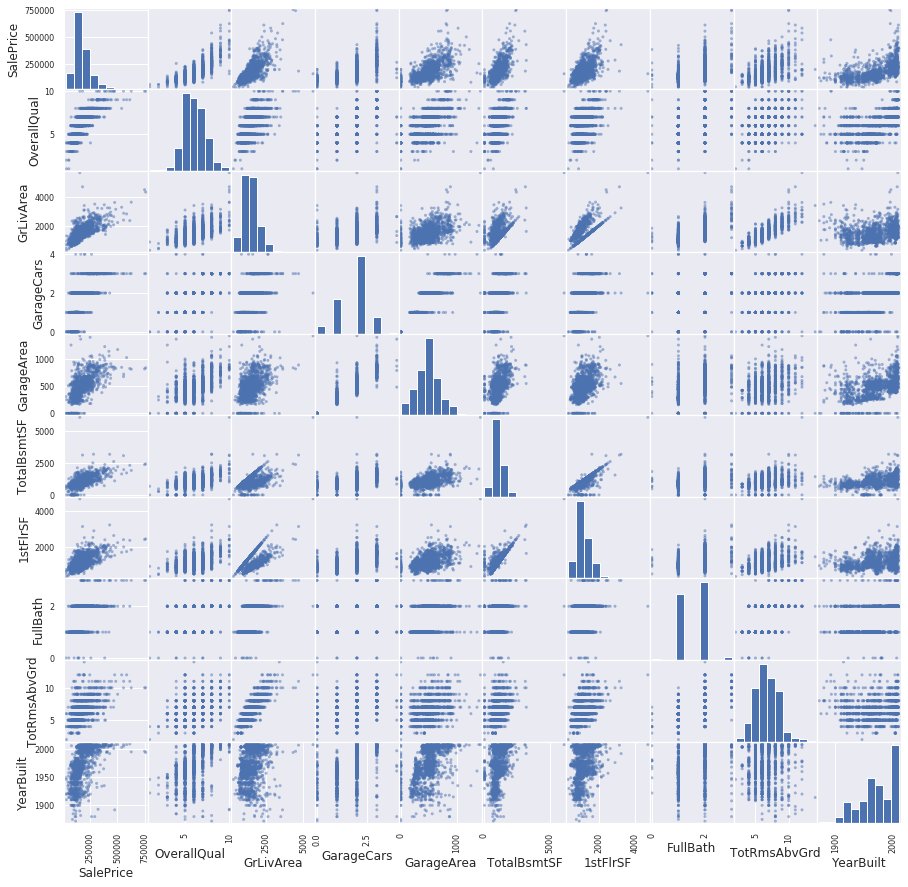

In [3]:
pd.plotting.scatter_matrix(houses[correlations.index], figsize=(15, 15))

The SalePrice feature after being normalized:


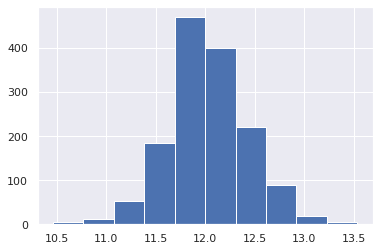

In [4]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

houses_test = pd.read_csv("./test.csv");

# Features that have a correlation to the SalePrice:
cols = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt"]

# Skewing the SalePrice with log(x + 1):
houses["SalePrice"] = np.log1p(houses["SalePrice"])
print("The SalePrice feature after being normalized:")
houses["SalePrice"].hist()

X_train = houses[cols];
y_train = houses[["SalePrice"]];

amount_of_splits = 4;

kf = KFold(n_splits=amount_of_splits)

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [5]:
from sklearn import linear_model

# get amount of missing cells by column:
missing_values = houses.isnull().sum(axis=0)
print("Missing values per column:")
missing_values[missing_values.values > 0].head(60)

Missing values per column:


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
houses.dtypes[(houses.dtypes == "int64") | (houses.dtypes == "float64")].head(60)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [7]:
from sklearn import preprocessing
# Numeric features that can be used as train data:
all_features = ["MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]

houses["BsmtFinSF2"] = houses["BsmtFinSF2"].fillna(0)
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(0)
houses = houses.drop(["GarageYrBlt"], axis=1, inplace=False, errors="ignore")

lasso = linear_model.Lasso(alpha=0.1)


In [8]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 7.4)

In [10]:
print("Lasso: \t\t" + str(cross_val_score(lasso, houses[all_features], houses["SalePrice"], cv=kf).mean()))
print("ElasticNet: \t" + str(cross_val_score(en, houses[all_features], houses["SalePrice"], cv=kf).mean()))
print("Ridge: \t\t" + str(cross_val_score(ridge, houses[all_features], houses["SalePrice"], cv=kf).mean()))

Lasso: 		0.7674239440121928
ElasticNet: 	0.7604512240269683
Ridge: 		0.8482097435304797


In [11]:
from sklearn.model_selection import GridSearchCV

params={'alpha': [6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6]}
clf = GridSearchCV(ridge, params, cv=kf, verbose = 1, scoring = 'neg_mean_squared_error').fit(houses[all_features], houses["SalePrice"])
print("Best configuration for Ridge algorithm:")
clf.best_estimator_
# pd.DataFrame(clf.cv_results_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best configuration for Ridge algorithm:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


Ridge(alpha=7.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
# Finally training the algorithm with all numeric features and the SalePrice
ridge.fit(houses[all_features], houses["SalePrice"])
print("Predicted prices:")
predicted_prices = np.exp(ridge.predict(houses[all_features]))
predicted_prices

Predicted prices:


array([209556.17793696, 197052.39434033, 216255.02401215, ...,
       222683.20871717, 130980.90139147, 150353.59056074])